In [1]:
import numpy as np
from scipy.integrate import odeint
import ORdmm_Land as model
import matplotlib.pyplot as plt



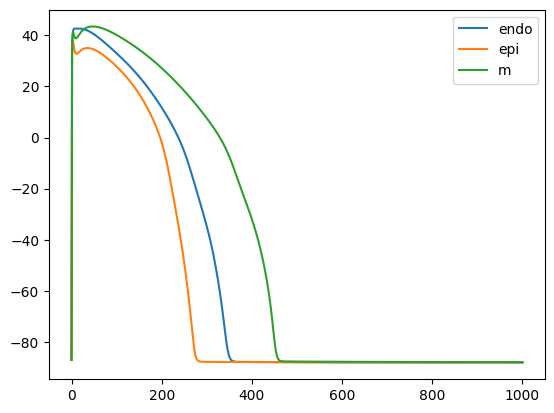

In [2]:
# Initial states
y0 = model.init_state_values()
# Parameters
parameters = model.init_parameter_values(celltype=0)
# Time steps
T = np.arange(0.0, 1000, 0.1)
Y = odeint(model.rhs, y0, T, args=(parameters,))
plt.plot(T, Y[:, model.state_indices("v")])


# Initial states
y0 = model.init_state_values()
# Parameters
parameters = model.init_parameter_values(celltype=1)
# Time steps
T = np.arange(0.0, 1000, 0.1)
Y = odeint(model.rhs, y0, T, args=(parameters,))
plt.plot(T, Y[:, model.state_indices("v")])


# Initial states
y0 = model.init_state_values()
# Parameters
parameters = model.init_parameter_values(celltype=2)
# Time steps
T = np.arange(0.0, 1000, 0.1)
Y = odeint(model.rhs, y0, T, args=(parameters,))
plt.plot(T, Y[:, model.state_indices("v")])


plt.legend((r"endo", r"epi", r"m"))
plt.show()
